### Bubble Chart

In [4]:
from pymongo import MongoClient
import pandas as pd
import plotly.express as px
import numpy as np

client = MongoClient()
db = client.POLICE_DATABASE_CLEANED
db_collection = db.POLICE_INTERVIEWS

df = pd.read_csv('Stop_and_Search__Field_Interviews_Cleaned.csv', sep=',', low_memory=False )
print('Number records recieved: {}'.format(len(df)))
records = df.to_dict(orient = 'records')

result = db_collection.insert_many(records)

print('Verify number records inserted to mongo: {}'.format(db_collection.count_documents({})))


### Reading documents from Mongo "POLICE_DATABASE_CLEANED"

In [5]:
from pymongo import MongoClient
import pandas as pd

connect = MongoClient()
db = connect.POLICE_DATABASE_CLEANED
mdb_collection = db.POLICE_INTERVIEWS
documents = mdb_collection.find()
df = pd.DataFrame.from_records(documents)
print(len(df))

581431


A named CSS color:
            aliceblue, antiquewhite, aqua, aquamarine, azure,
            beige, bisque, black, blanchedalmond, blue,
            blueviolet, brown, burlywood, cadetblue,
            chartreuse, chocolate, coral, cornflowerblue,
            cornsilk, crimson, cyan, darkblue, darkcyan,
            darkgoldenrod, darkgray, darkgrey, darkgreen,
            darkkhaki, darkmagenta, darkolivegreen, darkorange,
            darkorchid, darkred, darksalmon, darkseagreen,
            darkslateblue, darkslategray, darkslategrey,
            darkturquoise, darkviolet, deeppink, deepskyblue,
            dimgray, dimgrey, dodgerblue, firebrick,
            floralwhite, forestgreen, fuchsia, gainsboro,
            ghostwhite, gold, goldenrod, gray, grey, green,
            greenyellow, honeydew, hotpink, indianred, indigo,
            ivory, khaki, lavender, lavenderblush, lawngreen,
            lemonchiffon, lightblue, lightcoral, lightcyan,
            lightgoldenrodyellow, lightgray, lightgrey,
            lightgreen, lightpink, lightsalmon, lightseagreen,
            lightskyblue, lightslategray, lightslategrey,
            lightsteelblue, lightyellow, lime, limegreen,
            linen, magenta, maroon, mediumaquamarine,
            mediumblue, mediumorchid, mediumpurple,
            mediumseagreen, mediumslateblue, mediumspringgreen,
            mediumturquoise, mediumvioletred, midnightblue,
            mintcream, mistyrose, moccasin, navajowhite, navy,
            oldlace, olive, olivedrab, orange, orangered,
            orchid, palegoldenrod, palegreen, paleturquoise,
            palevioletred, papayawhip, peachpuff, peru, pink,
            plum, powderblue, purple, red, rosybrown,
            royalblue, rebeccapurple, saddlebrown, salmon,
            sandybrown, seagreen, seashell, sienna, silver,
            skyblue, slateblue, slategray, slategrey, snow,
            springgreen, steelblue, tan, teal, thistle, tomato,
            turquoise, violet, wheat, white, whitesmoke,
            yellow, yellowgreen

In [6]:
color_map = dict([
       ('WHITE', 'white'),
       ('BLACK', 'black'),
       ('SILVER', 'silver'),
       ('GRAY','darkgray'),
       ('BLUE', 'blue'),
       ('RED', 'red'),
       ('GREEN', 'green'),
       ('GOLD','gold'),
       ('TAN','tan'),
       ('MAROON', 'maroon'), 
       ('BEIGE', 'beige'), 
       ('BROWN', 'brown'), 
       ('BURGUNDY','darkred'),
       ('YELLOW', 'yellow'), 
       ('ORANGE', 'orange'), 
       ('PURPLE', 'purple'), 
       ('STAINLESS STEEL','lightslategray'),
       ('BRONZE', 'goldenrod'), 
       ('MULTICOLORED', 'palevioletred'), 
       ('CREAM', 'whitesmoke'), 
       ('TEAL (GREEN)','forestgreen'),
       ('COPPER','coral'),
       ('PINK','pink'),
       ('CAMOUFLAGE','royalblue')])


def _get_color_for_VehicleColor(feature_by):
    colors =[]
    for item in feature_by:
      colors.append(color_map[item])
    return  pd.Series(colors)   

def _get_color_for_SubjectRace(feature_by):
    colors =[]
    for item in feature_by:
        if item == 'BLACK':
            colors.append('black')
        if item == 'WHITE':
            colors.append('deeppink')
        if item == 'HISPANIC':
            colors.append('brown')
        if item == 'ASIAN':
            colors.append('yellow')
        if item == 'UNKNOWN':
            colors.append('green')
        if item == 'AMER. IND.':
            colors.append('red')
    return  pd.Series(colors)      

def _get_colors(feature_by, df):  
  
    if feature_by == 'SubjectRace':
        return _get_color_for_SubjectRace(df[feature_by])
    elif feature_by == 'VehicleColor':
        return _get_color_for_VehicleColor(df[feature_by])
    else:
        print('unsupport feature color')

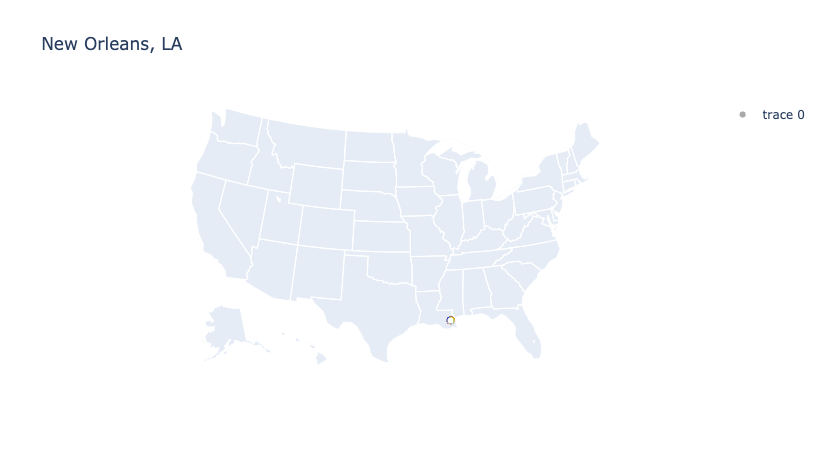

In [8]:
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
from pymongo import MongoClient

connect = MongoClient()
db = connect.POLICE_DATABASE_CLEANED
mdb_collection = db.POLICE_INTERVIEWS

limit = 1000
feature_by = "VehicleColor"

filter={"$and":[{"Longitude":{"$ne":np.nan}},               
                {"Latitude":{"$ne":np.nan}},
                {"Zip":{"$ne":np.nan}},
                {feature_by:{"$ne":np.nan}}]}

cursor = mdb_collection.find(filter, {"_id":0, "Longitude" : 1,'Latitude':1, 'Zip':1, feature_by:1}).limit(limit)
df = pd.DataFrame.from_records(cursor)
df.Zip = df.Zip.astype('int64')
df['text'] = feature_by + ': ' + df[feature_by].astype(str) + ', ' + 'Zip'+ ':'+ df['Zip'].astype(str)

df['color'] = _get_colors(feature_by, df)

fig = go.Figure(data=go.Scattergeo(
        lon = df['Longitude'],
        lat = df['Latitude'],
        text = df['text'],
        mode = 'markers',
        marker_color = df['color']
        ))
fig.update_layout(
        title = 'New Orleans, LA',
        geo_scope='usa',
        showlegend = True,
    )


fig.show()
